<a href="https://colab.research.google.com/github/anupstar100/Chronic-Kidney-Disease-Prediction/blob/main/Chronic_Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

# Dataset description
1. age		-	age
2. bp		-	blood pressure
3. sg		-	specific gravity
4. al		-   	albumin
5. su		-	sugar
6. rbc		-	red blood cells
7. pc		-	pus cell
8. pcc		-	pus cell clumps
9. ba		-	bacteria
10.	bgr		-	blood glucose random
11.	bu		-	blood urea
12.	sc		-	serum creatinine
13.	sod		-	sodium
14.	pot		-	potassium
15.	hemo		-	hemoglobin
16.	pcv		-	packed cell volume
17.	wc		-	white blood cell count
18.	rc		-	red blood cell count
19.	htn		-	hypertension
20.	dm		-	diabetes mellitus
21.	cad		-	coronary artery disease
22.	appet		-	appetite
23.	pe		-	pedal edema
24.	ane		-	anemia
25.	class		-	class

---
* Number of instances: 400 (250 CKD, 150 not ckd)
* Number of attributes: 24 + class = 25 (11 numerica, 14 nominal)

# Attribute Information
1. Age (numerical) --> age in years
2. Blood Pressure (numerical) --> bp in mm/Hg
3. Specific Gravity (nominal) --> sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin (nominal) --> al - (0,1,2,3,4,5)
5. Sugar (nominal) --> su - (0,1,2,3,4,5)
6. Red Blood Cells (nominal) --> rbc - (normal,abnormal)
7. Pus Cell (nominal) --> pc - (normal,abnormal)
8. Pus Cell clumps (nominal) --> pcc - (present,notpresent)
9. Bacteria (nominal) --> ba - (present,notpresent)
10. Blood Glucose Random (numerical) --> bgr in mgs/dl
11. Blood Urea (numerical) --> bu in mgs/dl
12. Serum Creatinine (numerical) --> sc in mgs/dl
13. Sodium (numerical) --> sod in mEq/L
14. Potassium (numerical) --> pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)	
		rc in millions/cmm
 	19.Hypertension(nominal)	
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)	
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)	
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)	
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)		
		class - (ckd,notckd)

In [35]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [2]:
# reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# checking shape
df.shape

(400, 26)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Data Cleaning

In [5]:
# drop id column
df.drop('id', axis = 1, inplace = True)
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


According to the data:
* Columns pcv, wc and rc needs to convert back in numerical.
* Columns sg, al and su should be nominal , convert from float to object.

In [8]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
df[['specific_gravity', 'albumin', 'sugar']] = df[['specific_gravity', 'albumin', 'sugar']].astype('object')

In [13]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [17]:
# Extracting categorical and numerical columns
cat_cols = df.describe(include = ['O']).columns
num_cols = df.describe().columns

In [20]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values\n')

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [22]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
df['diabetes_mellitus'].replace({' yes' : 'yes', '\tno' : 'no', '\tyes' : 'yes'}, inplace = True)
df['coronary_artery_disease'].replace({'\tno' : 'no'}, inplace = True)
df['class'].replace({'ckd\t' : 'ckd'}, inplace = True)

In [23]:
# by looping & looking at unique values in categorical columns again
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values\n')

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [26]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
# coverting target col into numeric to check correlation
df['class'] = df['class'].map({'ckd' : 0, 'notckd' : 1}).astype('int')

In [27]:
# let's see the cols in numerical col list
cat_cols

Index(['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
       'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia',
       'class'],
      dtype='object')

# EDA

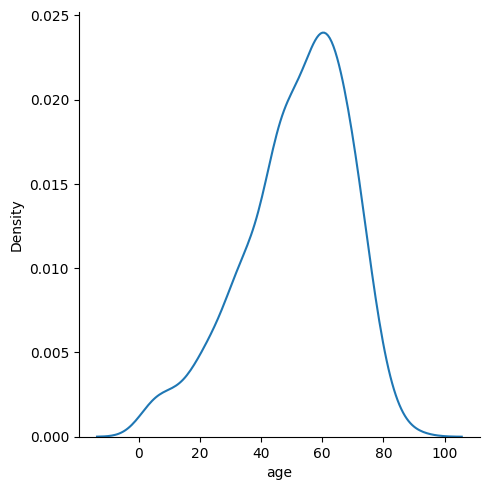

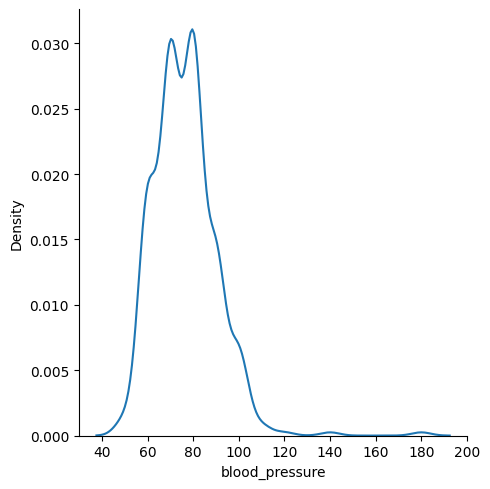

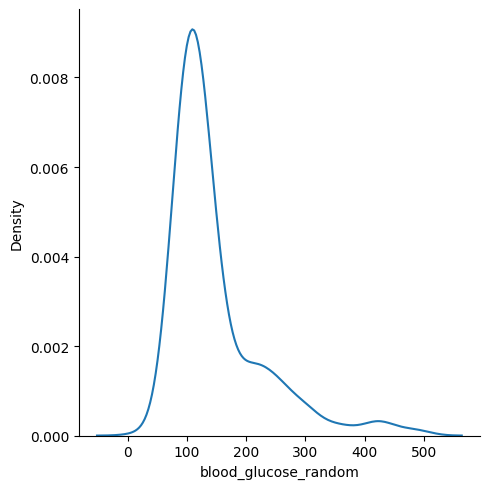

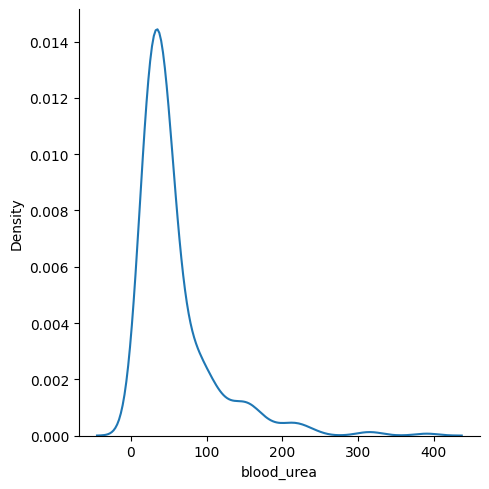

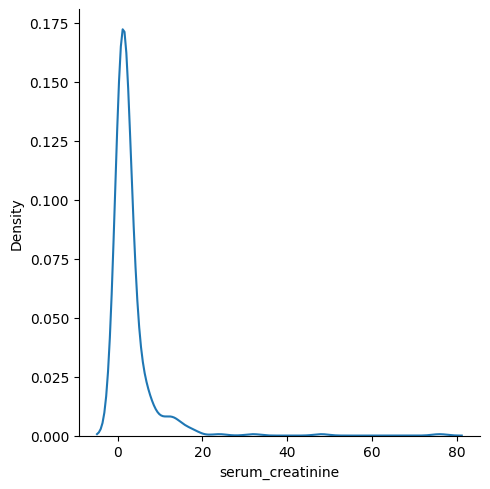

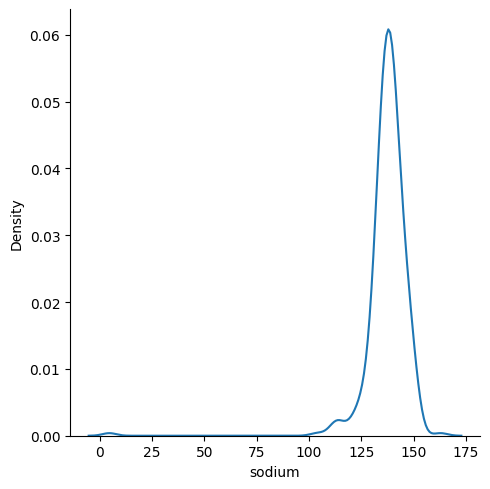

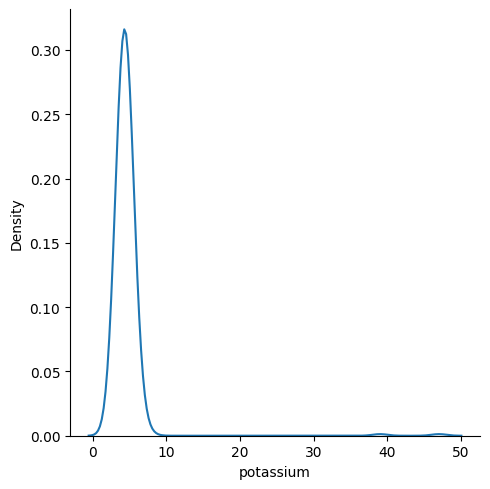

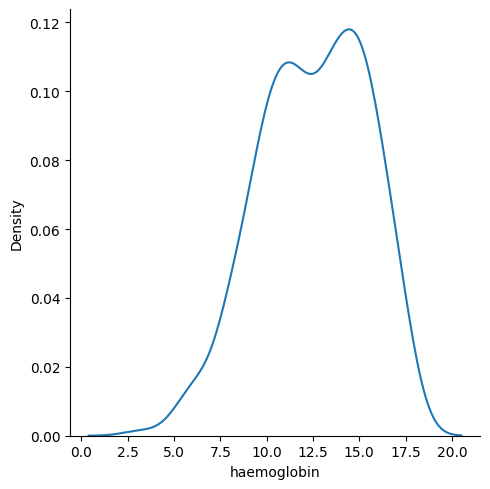

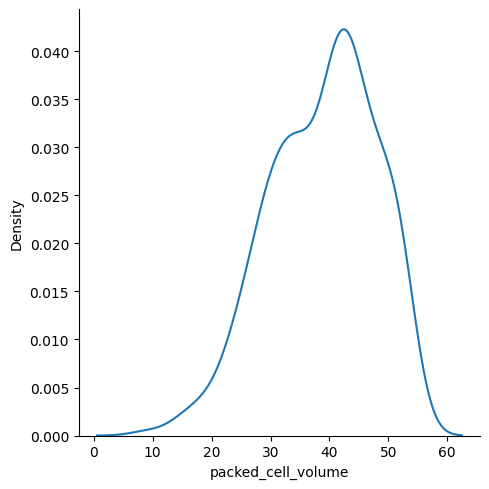

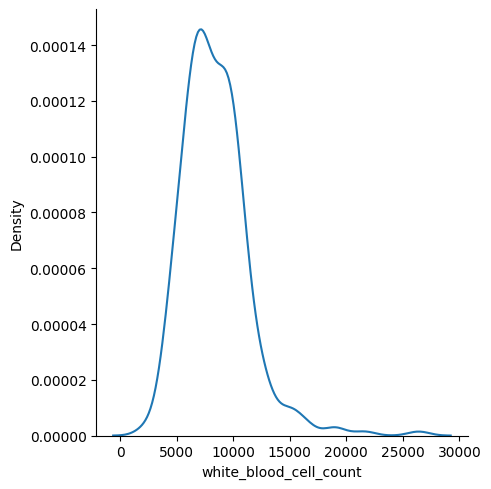

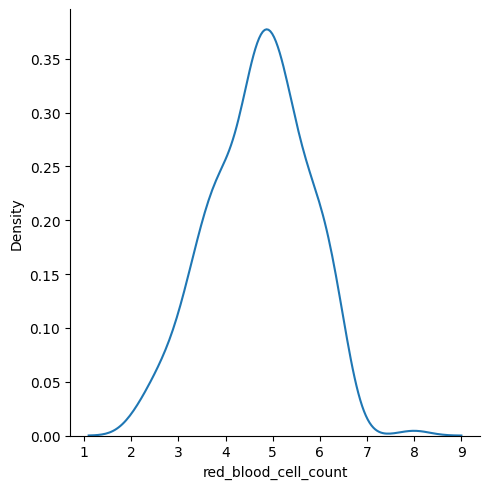

In [36]:
# checking numerical features distribution
for col in num_cols:
    sns.displot(df[col], kind = 'kde')
    plt.show()

In [37]:
# let's see the cols in cat col list
cat_cols

Index(['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
       'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia',
       'class'],
      dtype='object')

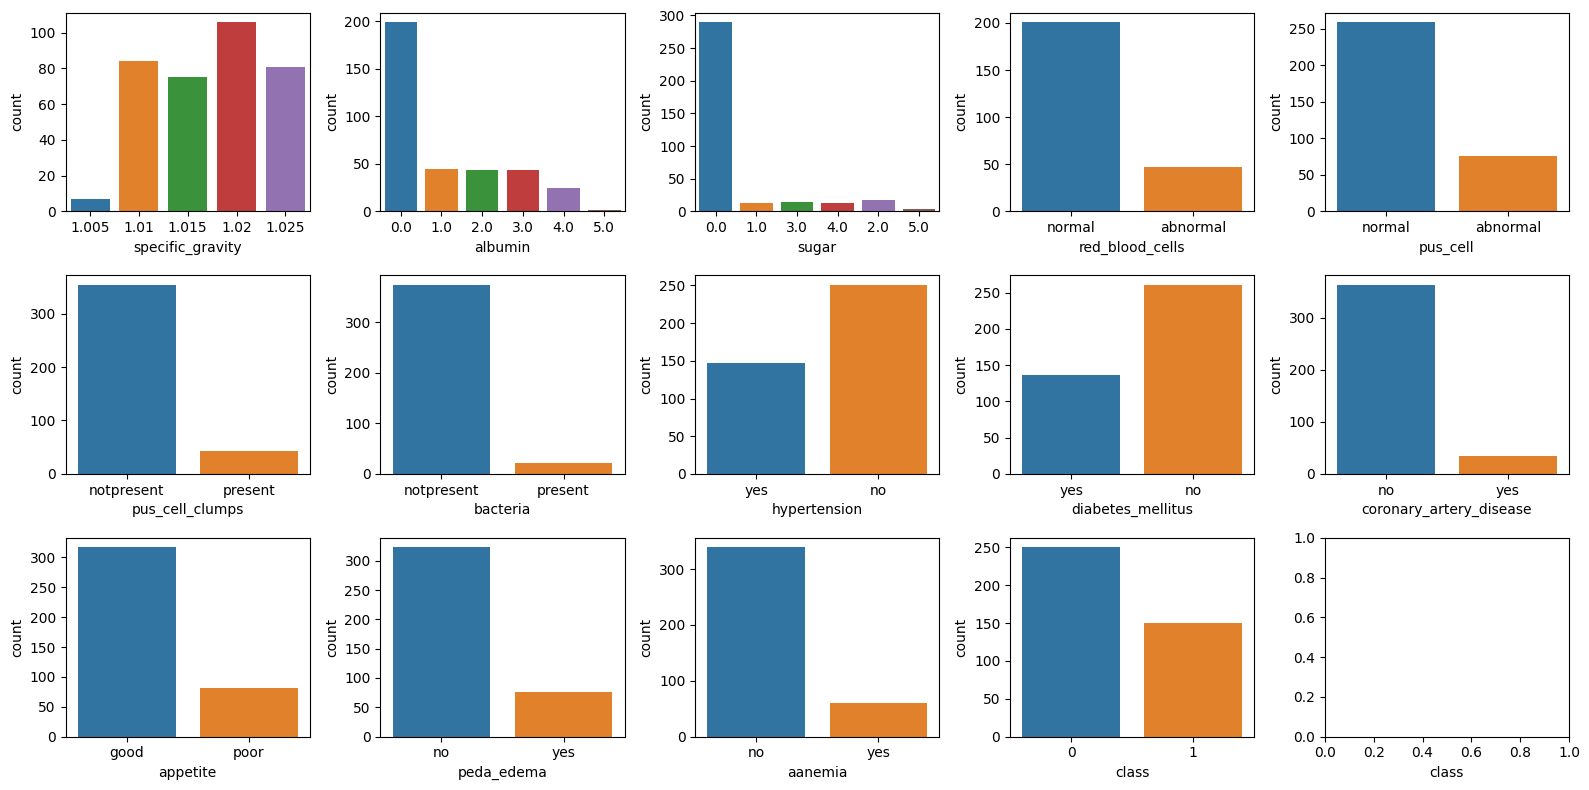

In [41]:
# checking cat features distribution
# create the figure and axes
fig, axes = plt.subplots(3, 5, figsize = (16, 8))
axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col, ax in zip(cat_cols, axes):
    sns.countplot(data = df, x = col, ax = ax)
    plt.xlabel(col)
    plt.tight_layout()

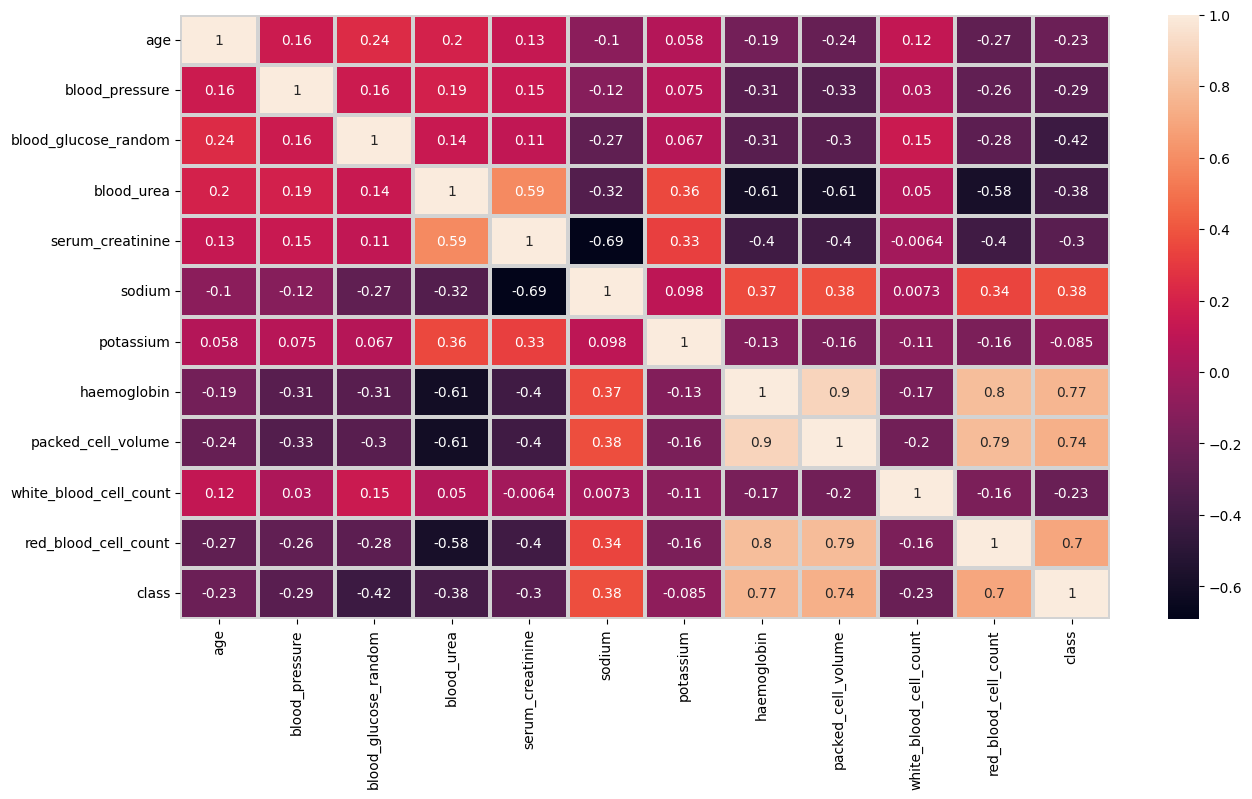

In [42]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()